# 0. Import des modules

In [1]:
# pour faire des graphes
%matplotlib inline
import matplotlib.pyplot as plt

# pour faire des calculs (nombres aléatoires)
import numpy as np

# pour faire des graphes de stats
import seaborn as sns
sns.set()

# 1. Générer des nombres aléatoires

## 1.1. Pile ou face

In [8]:
np.random.choice(['Pile', 'Face'], p=[0.1, 0.9])

'Pile'

Sur 100 tirages, combien de "pile" ?

In [10]:
cnt = 0
for i in range(100):
    if np.random.choice(['Pile', 'Face']) == 'Pile':
        cnt += 1
        
print(f"J'ai obtenu {cnt} 'pile'.")

J'ai obtenu 49 'pile'.


En une ligne :

In [12]:
np.sum([np.random.choice(['Pile', 'Face']) == 'Pile' for i in range(100)])

47

In [14]:
np.sum(np.random.choice(['Pile', 'Face'], size=100) == 'Pile')

53

On en fait une fonction.

In [24]:
def nb_piles(nb_tirages=100, p=None):
    return np.sum(np.random.choice(['Pile', 'Face'], size=nb_tirages, p=p) == 'Pile')

for i in range(5):
    print(nb_piles())

50
47
46
58
54


/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


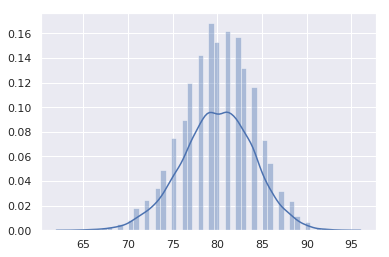

In [25]:
stats = [nb_piles(p=[0.8, 0.2]) for i in range(10000)]

sns.distplot(stats)

In [26]:
np.random.choice(['Pierre', 'Feuille', 'Ciseaux'])

'Feuille'

## 1.2. Loi uniforme

In [27]:
np.random.uniform()

0.5171371762694122

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


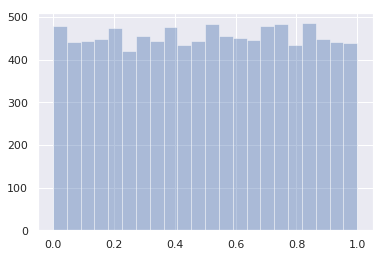

In [29]:
stats = np.random.uniform(size=10000)

sns.distplot(stats, kde=False)

## 1.3. Loi exponentielle

Cela représente le temps entre deux requêtes à un serveur.

In [32]:
inter = np.random.exponential(size=5)
inter

array([2.42962795, 1.01620549, 0.97249329, 0.68012817, 3.20533766])

In [33]:
inter.cumsum()

array([2.42962795, 3.44583343, 4.41832672, 5.09845489, 8.30379254])

In [35]:
fin = inter.cumsum() + 1.0
fin

array([3.42962795, 4.44583343, 5.41832672, 6.09845489, 9.30379254])

In [36]:
for idx, val in enumerate(inter):
    print(idx, val)

0 2.429627945579207
1 1.0162054852699938
2 0.9724932866243811
3 0.680128168604842
4 3.205337658916321


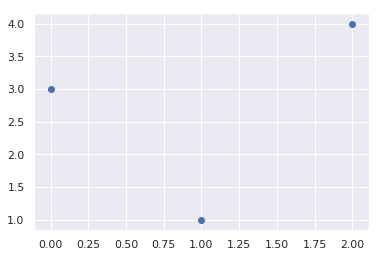

In [38]:
plt.scatter(x=[0, 1, 2], y=[3, 1, 4])

In [40]:
def plus_one(x):
    return x + 1

plus_one(5)

6

In [41]:
def factoriel(n):
    if n == 1:
        return n
    return n * factoriel(n-1)

factoriel(5)

120

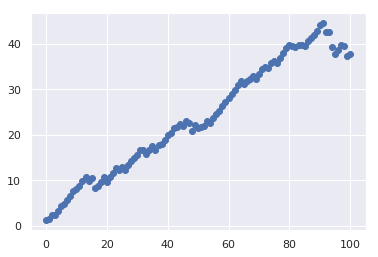

In [60]:
def temps_attente(n):
    """Calcule le temps d'attente pour la requête n"""
    if n == 0:
        stats.append(tempsCalcul)
        return tempsCalcul
    
    temps = np.random.exponential()
    
    if temps > tempsCalcul:
        res = tempsCalcul + max(temps_attente(n - 1) - temps, 0)
    else:
        res = temps_attente(n - 1) + tempsCalcul - temps
    
    stats.append(res)
    return res

tempsCalcul = 1.2
stats = []

temps_attente(100)

plt.scatter(x=range(len(stats)), y=stats)

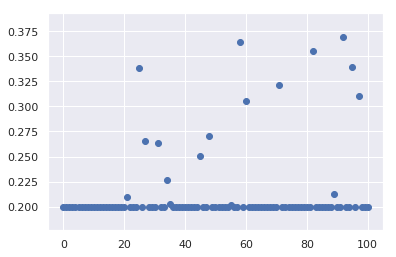

In [63]:
tempsCalcul = 0.2
stats = []

temps_attente(100)

plt.scatter(x=range(len(stats)), y=stats)

# 2. Régression (pour de la prévision)

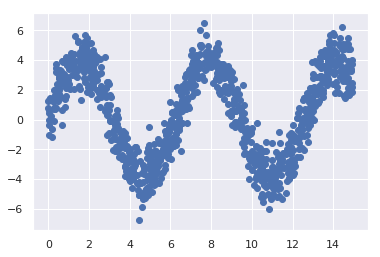

In [66]:
nb = 1000

x = np.random.uniform(low=0.0, high=15.0, size=nb)
y = 4.0 * np.sin(x) + np.random.normal(size=nb)

plt.scatter(x, y)

R2-score : -0.008640733826358549


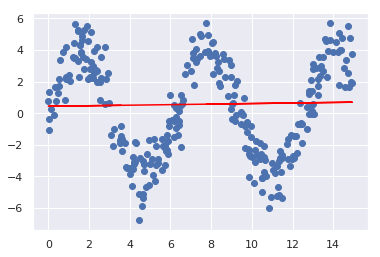

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Définir X et y
X = x.reshape(-1, 1) # pour transformer une colonne en tableau
y = y

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# instanciation du régresseur
reg = LinearRegression()

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

R2-score : 0.8793763871687624


/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


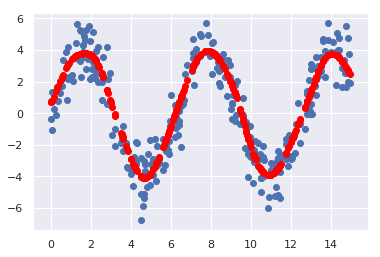

In [72]:
from sklearn.svm import SVR

# instanciation du régresseur
reg = SVR()

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')

R2-score : 0.875024913403274


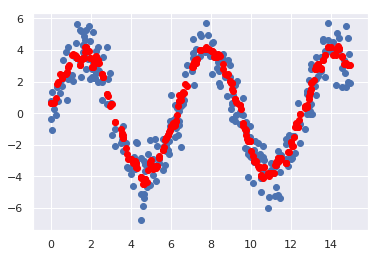

In [76]:
from sklearn.neighbors import KNeighborsRegressor

# instanciation du régresseur
reg = KNeighborsRegressor(n_neighbors=10)

# apprentissage
reg.fit(X_train, y_train)

# prédiction
y_pred = reg.predict(X_test)

# calcul du score
print("R2-score :", r2_score(y_test, y_pred))

# plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')

In [81]:
def score_func(X, y, reg, nb_splits=10):
    """Rend la liste des scores du régresseur reg sur le problème X, y"""
    scores = []
    
    # boucle sur les splits possibles
    for i in range(nb_splits):
        # split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # apprentissage
        reg.fit(X_train, y_train)

        # prédiction
        y_pred = reg.predict(X_test)

        # calcul du score
        scores.append(r2_score(y_test, y_pred))
        
    return scores

scores = score_func(X, y, KNeighborsRegressor(), nb_splits=5)
print(f"Score : {np.mean(scores):.2f} +/- {2 * np.std(scores):.2f}")

Score : 0.86 +/- 0.01
